# Road Traffic Vehicle Counting Exam

In this exam, you will use the YOLO (You Only Look Once) object detection model to analyze a video of road traffic. Your primary task is to count the number of vehicles exiting the road at each of the four exits (located at the top, bottom, left, and right of the frame). The video for this task is provided at `Datasets/YOLO_Exam_Video.mp4`.

## Objectives
- Load and process the video using OpenCV.
- Utilize the YOLO model to detect vehicles in each frame.
- Manipulate the video frames using OpenCV.
- Track vehicles as they move across the video frames.
- Count the number of vehicles exiting via the top street.
- Count the number of vehicles exiting via the bottom street.
- Count the number of vehicles exiting via the left street.
- Count the number of vehicles exiting via the right street.


## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [1]:
!pip install ultralytics
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 18.5 MB/s eta 0:00:00


## Import Libraries

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

## Load the YOLO Model

You will first need to load the YOLO model, there is a custom model for this exam called `YOLO_Model.pt` under Datasets file ⚠️ PLEASE USE THIS MODEL AND DO NOT USE ANY OTHER MODEL ⚠️.
Write the code to load the YOLO model below:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model = YOLO('/content/drive/MyDrive/Copy of YOLO_Model.pt')

## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

In [143]:
capture = cv2.VideoCapture('/content/YOLO_Video.mp4')

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [144]:
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(capture.get(cv2.CAP_PROP_FPS))

In [145]:
# I'm here checking that the video has loaded correctly and its information extracted correctly too
print(width)
print(height)
print(fps)

1920
1080
29


## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes, specified Region of Interest rectangle (ROI) and the counted vehicles on each sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [146]:
output_path = '/content/resulted_video_Last5.mp4'
format = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(output_path, format, fps, (width,height))

## Expermint to get the `(x1, y1, x2, y2)` of the ROI

### Hint
When defining the Regions of Interest (ROIs) for detecting vehicles exiting the road, consider the coordinates that outline the relevant areas. These coordinates can be specified as `(x1, y1, x2, y2)`, where `(x1, y1)` is the top-left corner and `(x2, y2)` is the bottom-right corner of the rectangle.

Experiment with different coordinates to accurately cover the streets where vehicles exit. Visualize these ROIs by drawing rectangles on a frame of the video and adjust the coordinates as needed until you capture the desired areas effectively.


0: 384x640 2 buss, 54 cars, 1 truck, 2 vans, 63.0ms
Speed: 3.4ms preprocess, 63.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


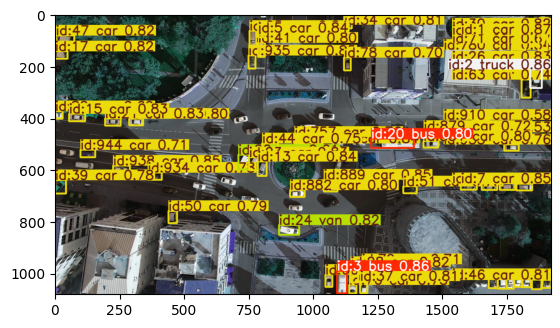

In [136]:
# I run the model on just one frame to take a lock about the detected objects, which may help to easily finde the (x1, y1, x2, y2) for the four regions
ret, frame = capture.read()
results = model(frame)

# Plot the resulted frame
annotated_frame = results[0].plot()
plt.imshow(annotated_frame)
plt.show()

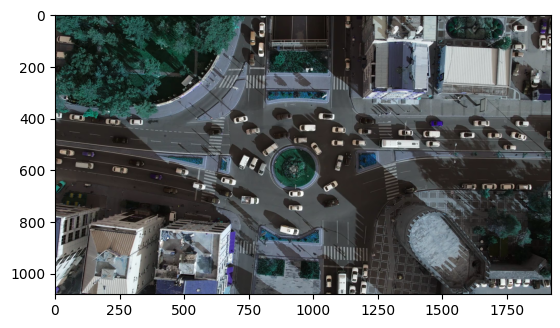

In [137]:
# Show the frame before pass it to the model
plt.imshow(frame)

## Get the coordinates for the 4 exits

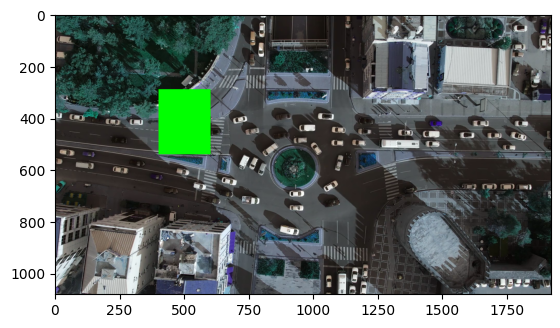

In [138]:
# I here tried many coordinates until I found the right one
# I did same for the rest 3 exits, but it was easy to finde them since I got the first one ( the exits in green)
ret, frame1 = capture.read()
frame1 = cv2.rectangle(frame1, (400, 540), (600, 290), (0, 255, 0), -1)
plt.imshow(frame1)
plt.show()

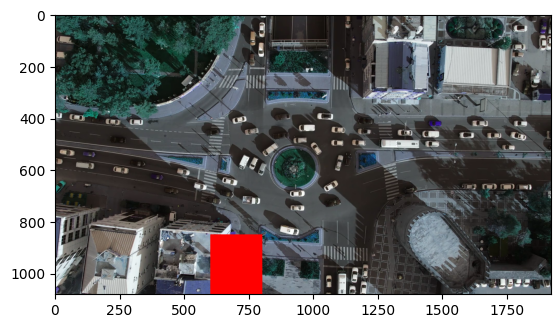

In [139]:
ret, frame2 = capture.read()
frame2 = cv2.rectangle(frame2, (600, 1100), (800, 850), (255, 0, 0), -1)
plt.imshow(frame2)

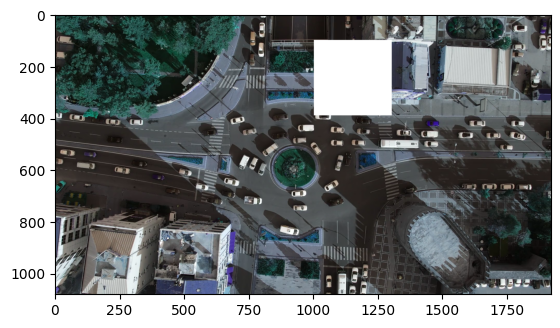

In [142]:
ret, frame3 = capture.read()
frame3 = cv2.rectangle(frame3, (1300, 390), (1000, 100), (255, 255, 255), -1)
plt.imshow(frame3)

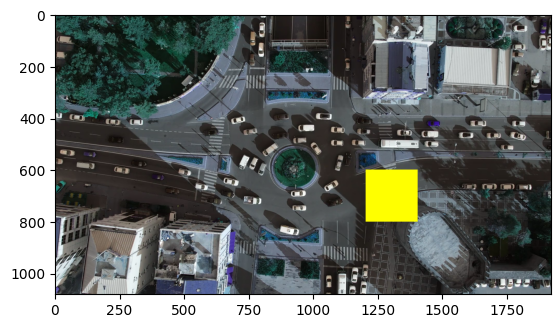

In [141]:
ret, frame4 = capture.read()
frame4 = cv2.rectangle(frame4, (1200, 800), (1400, 600), (255, 255, 0), -1)
plt.imshow(frame4)

## Process Video Frames and Identify Vehicles Left the Road Form Each Street

For each frame in the video, use the YOLO model to detect and track vehicles. You will need to write a loop that processes each frame and applies the YOLO model.

In each frame, after detecting the vehicles, determine whether they exited the road via the top, bottom, left, or right street. You can use the positions of the bounding boxes provided by YOLO to do this.

- The video should display bounding boxes around the detected objects.
- The video should display your name on the top.
- It should display the calculated center of each vehicle.
- The video should display the confidence score, alongside the object ID and class ID of each detected and tracked object.
- The video should display the rectangles representing the regions where you count the vehicles that have crossed and exited.
- The video should display the number of vehicles that exited via the top street.
- The video should display the number of vehicles that exited via the bottom street.
- The video should display the number of vehicles that exited via the left street.
- The video should display the number of vehicles that exited via the right street.

In [147]:
# I used the above defined coordinates but in the format of (x, y, width, height)
# By applying the following equations
# ROI = (x1, y1), (x2, y2)
# width = x2 - x1
# height = y2 - y1
# I used this way becuase when I defined it as (x1, y1, x2, y2) it did not work well


ROI_top_left = ((400, 290, 200, 250))
ROI_top_right = ((1300, 100, -200, 200))
ROI_bottom_left = ((600, 850, 200, 250))
ROI_bottom_right = ((1200, 600, 200, 200))

unique_ids_top_left = set()
unique_ids_top_right = set()
unique_ids_bottom_left = set()
unique_ids_bottom_right = set()
unique_ids_total = set()

color = (255, 0, 0)

thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_thickness = 2

ret = True
while ret:
    ret, frame = capture.read()

    if not ret:
        break

    # I added my name in the top of the video as required
    cv2.putText(frame, 'Refal Alharbi', (10, 30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)


    results = model.track(frame, persist=True)

    for result in results:
        for obj in result.boxes:
            class_id = int(obj.cls[0].cpu().numpy()) if obj.cls is not None else -1
            bbox = obj.xyxy[0].cpu().numpy()
            conf = obj.conf[0].cpu().numpy() if obj.conf is not None else 0.0
            obj_id = int(obj.id[0].cpu().numpy()) if obj.id is not None else -1

            unique_ids_total.add(obj_id)


            x1, y1, x2, y2 = map(int, bbox)
            center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2


            if (ROI_top_left[0] <= center_x <= ROI_top_left[0] + ROI_top_left[2] and
                ROI_top_left[1] <= center_y <= ROI_top_left[1] + ROI_top_left[3]):
                unique_ids_top_left.add(obj_id)
                cv2.rectangle(frame, (ROI_top_left[0], ROI_top_left[1]),
                              (ROI_top_left[0] + ROI_top_left[2], ROI_top_left[1] + ROI_top_left[3]),
                              color, thickness)
                label = f'ID: {obj_id} Class: {class_id} Conf: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

            elif (ROI_top_right[0] <= center_x <= ROI_top_right[0] + ROI_top_right[2] and
                  ROI_top_right[1] <= center_y <= ROI_top_right[1] + ROI_top_right[3]):
                unique_ids_top_right.add(obj_id)
                cv2.rectangle(frame, (ROI_top_right[0], ROI_top_right[1]),
                              (ROI_top_right[0] + ROI_top_right[2], ROI_top_right[1] + ROI_top_right[3]),
                              color, thickness)
                label = f'ID: {obj_id} Class: {class_id} Conf: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

            elif (ROI_bottom_left[0] <= center_x <= ROI_bottom_left[0] + ROI_bottom_left[2] and
                  ROI_bottom_left[1] <= center_y <= ROI_bottom_left[1] + ROI_bottom_left[3]):
                unique_ids_bottom_left.add(obj_id)
                cv2.rectangle(frame, (ROI_bottom_left[0], ROI_bottom_left[1]),
                              (ROI_bottom_left[0] + ROI_bottom_left[2], ROI_bottom_left[1] + ROI_bottom_left[3]),
                              color, thickness)
                label = f'ID: {obj_id} Class: {class_id} Conf: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

            elif (ROI_bottom_right[0] <= center_x <= ROI_bottom_right[0] + ROI_bottom_right[2] and
                  ROI_bottom_right[1] <= center_y <= ROI_bottom_right[1] + ROI_bottom_right[3]):
                unique_ids_bottom_right.add(obj_id)
                cv2.rectangle(frame, (ROI_bottom_right[0], ROI_bottom_right[1]),
                              (ROI_bottom_right[0] + ROI_bottom_right[2], ROI_bottom_right[1] + ROI_bottom_right[3]),
                              color, thickness)
                label = f'ID: {obj_id} Class: {class_id} Conf: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)
            else:
                continue


    unique_count_label = f'Total Unique Objects: {len(unique_ids_total)}'
    cv2.putText(frame, unique_count_label, (10, height - 20), font, 0.7, (255, 255, 255), font_thickness, cv2.LINE_AA)

    top_left_count = f'Top Left Cars: {len(unique_ids_top_left)}'
    cv2.putText(frame, top_left_count, (10, height - 40), font, font_scale, color, font_thickness, cv2.LINE_AA)

    top_right_count = f'Top Right Cars: {len(unique_ids_top_right)}'
    cv2.putText(frame, top_right_count, (10, height - 60), font, font_scale, color, font_thickness, cv2.LINE_AA)

    bottom_left_count = f'Bottom Left Cars: {len(unique_ids_bottom_left)}'
    cv2.putText(frame, bottom_left_count, (10, height - 80), font, font_scale, color, font_thickness, cv2.LINE_AA)

    bottom_right_count = f'Bottom Right Cars: {len(unique_ids_bottom_right)}'
    cv2.putText(frame, bottom_right_count, (10, height - 100), font, font_scale, color, font_thickness, cv2.LINE_AA)

    output_video.write(frame)

capture.release()
output_video.release()


0: 384x640 2 buss, 88 cars, 2 trucks, 2 vans, 62.9ms
Speed: 2.9ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 88 cars, 2 trucks, 2 vans, 62.9ms
Speed: 3.6ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 88 cars, 2 trucks, 2 vans, 62.9ms
Speed: 3.8ms preprocess, 62.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 88 cars, 2 trucks, 2 vans, 62.9ms
Speed: 2.9ms preprocess, 62.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 88 cars, 2 trucks, 2 vans, 59.6ms
Speed: 2.9ms preprocess, 59.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 88 cars, 2 trucks, 2 vans, 47.7ms
Speed: 3.0ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 89 cars, 2 trucks, 2 vans, 47.7ms
Speed: 2.9ms preprocess, 47.7ms inferenc

## Save and Submit Your Work

Submit both the notebook and the output video

https://drive.google.com/file/d/1JXIwTNVWtR3TV6uNMmGKwz5ucvIViTxZ/view?usp=drive_link